In [33]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import cycle
import warnings
warnings.filterwarnings('ignore')

In [34]:
#Reading the data
HDR = pd.read_csv('SalesHDR.csv')

In [35]:
#Exploring the columns of the dataset for extracting the relevant attributes
HDR.columns

Index(['SHDR_IDL', 'HEADERTYPE', 'BUSDATE', 'RECEIPTNO', 'TABLENUM', 'NUMCUST',
       'TAX1NET', 'TAX1SALES', 'TAX1TYPE', 'TAX2NET', 'TAX2SALES', 'TAX2TYPE',
       'TAX3NET', 'TAX3SALES', 'TAX3TYPE', 'TAX4NET', 'TAX4SALES', 'TAX4TYPE',
       'TAX5NET', 'TAX5SALES', 'TAX5TYPE', 'TAX6NET', 'TAX6SALES', 'TAX6TYPE',
       'TAX7NET', 'TAX7SALES', 'TAX7TYPE', 'PENNYROUND', 'MDSETOTAL',
       'EOPEN_IDL', 'ECLOSE_IDL', 'DATESEATED', 'DATEOPEN', 'DATECLOSED',
       'CUST_IDL', 'BPOINTS', 'GCPPOINTS', 'GCPCARDNUM', 'STYPE_IDL',
       'STRACK_IDL', 'SECT_IDL', 'STAT_IDL', 'SHIFT_IDL', 'NOTES',
       'RCPTPRNTED', 'COSTTOTAL', 'TOTALDUE', 'SALEREPIDL', 'GRATUITY',
       'DEPOSITS', 'TAX_IDL', 'PUNCH_IDL', 'ISLOCKED', 'SSP', 'SSETUP',
       'WH_IDL', 'PRICELEVEL', 'COMMENT', 'FREIGHT', 'FREIGHTTX1',
       'FREIGHTTX2', 'PONUMBER', 'SHIPTO', 'LABEL', 'SEATCOUNT', 'TAXEXEMPT',
       'WAITING', 'STORENO', 'OTHERFEE'],
      dtype='object')

In [36]:
#Data Preprocessing

In [37]:
HDR = HDR[['HEADERTYPE','BUSDATE','TABLENUM','NUMCUST','MDSETOTAL']]

In [38]:
HDR.describe()

,TABLENUM,NUMCUST,MDSETOTAL
count,1.290070e+05,163075.000000,163075.000000
mean,3.952618e+04,2.046445,26.558964
std,1.418360e+07,1.665443,21.750994
min,0.000000e+00,0.000000,-5.750000
25%,1.400000e+01,1.000000,12.480000
50%,1.900000e+01,2.000000,22.950000
75%,2.400000e+01,3.000000,34.650000
max,5.094401e+09,85.000000,1500.000000


From here we can see that the Maximum Number of customers at one time was 85 and maximum sales got was 1500 for one reference bill . Also there are some inconsistencies in which the minimum value of Sales is a negative value which probably is a clerical error . We can find the negative values and replace them

In [39]:
HDR['MDSETOTAL'] = HDR['MDSETOTAL'].abs()

In [40]:
HDR.head(4)

,HEADERTYPE,BUSDATE,TABLENUM,NUMCUST,MDSETOTAL
0,S,2005-02-13,0.0,0,10.19
1,S,2005-02-13,0.0,0,9.95
2,S,2005-02-13,0.0,0,9.95
3,S,2008-12-19,50.0,2,10.17


In [41]:
HDR['TABLENUM']=HDR['TABLENUM'].fillna(0).astype(int)

In [42]:
HDR.BUSDATE=pd.to_datetime(HDR.BUSDATE) #Converting to datetime format

In [43]:
HDR.set_index('BUSDATE',inplace=True) #Changin the index into datetime

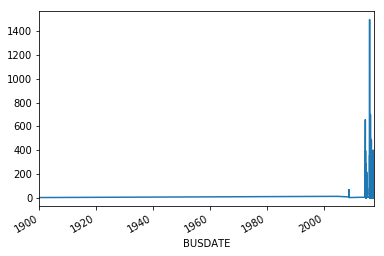

In [44]:
HDR.MDSETOTAL.plot() #Plotting the time series sales

Here we can see that there are errors in the indexing , so we need to slice the data from where we will get continuous data

In [45]:
HDR_resample_daily =HDR.resample('D',how='sum') #Resampling the data on daily basis

In [46]:
HDR_resample_daily.head(4)

,TABLENUM,NUMCUST,MDSETOTAL
BUSDATE,,,
1899-12-30,0,0,0.0
1899-12-31,0,0,0.0
1900-01-01,0,0,0.0
1900-01-02,0,0,0.0


In [47]:
HDR_resample_daily = HDR_resample_daily['2016-03-06':] #Slicing the data from we have the continuous data without missing values

In [48]:
HDR_resample_daily=HDR_resample_daily.drop('TABLENUM',axis=1) #Removing the unnecessary coloumn

# Different Visualizations of the Data 

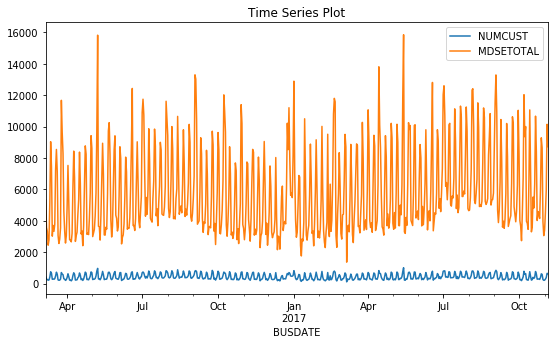

In [49]:
#Time series plot of Number of Customers and Total Sales in a day
HDR_resample_daily.plot(figsize=(9,5))
plt.title("Time Series Plot")
plt.show()

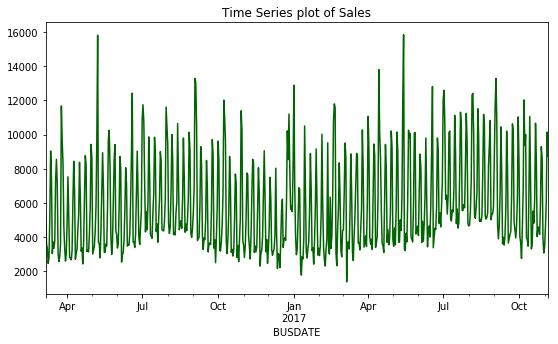

In [50]:
#Time Series plot of Sales
HDR_resample_daily['MDSETOTAL'].plot(figsize=(9,5),color="darkgreen")
plt.title("Time Series plot of Sales")
plt.show()

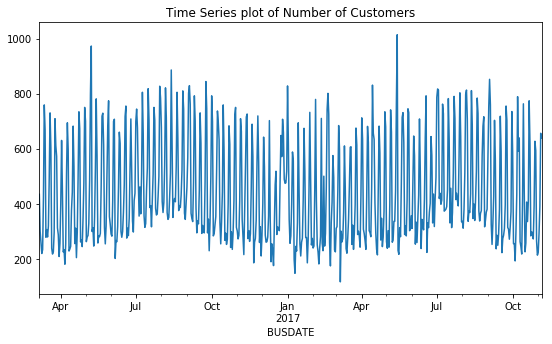

In [51]:
#Time Series plot of Number of Customers
HDR_resample_daily['NUMCUST'].plot(figsize=(9,5))
plt.title("Time Series plot of Number of Customers")
plt.show()

Since both of the Graphs look similar , we can try to find the correlation between these two variables

In [52]:
HDR_resample_daily['NUMCUST'].corr(HDR_resample_daily['MDSETOTAL'])

0.9654610436883545

These variables have very high correlation , we can confirm it by visualizing  a scatter plot

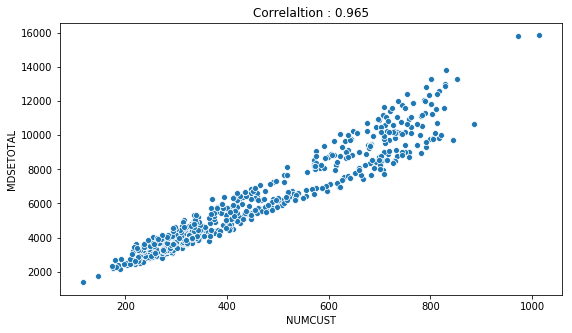

In [54]:
f = plt.figure(figsize=(9,5))
sns.scatterplot(x='NUMCUST',y='MDSETOTAL',data=HDR_resample_daily)
plt.title('Correlaltion : 0.965')
plt.show()

To find the Day Wise statistics , we can add a Day column to the Dataframe and then do visualizations

In [55]:
#Adding Days to the dataframe
days = cycle(['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'])
HDR_resample_daily['Day']=[next(days) for day in range(len(HDR_resample_daily))]

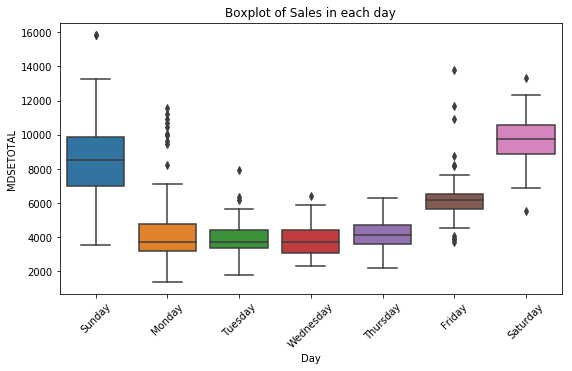

In [63]:
#Boxplot
f = plt.figure(figsize=(9,5))
sns.boxplot(x='Day',y='MDSETOTAL',data=HDR_resample_daily)
plt.xticks(rotation=45)
plt.title("Boxplot of Sales in each day")
plt.show()

Here , we can see that the sales are more in Saturday and Sunday and are comparitively less in weekdays

In [60]:
HDR_resample_daily.NUMCUST.mean()

442.7393442622951

The average number of customers in a days is 442 

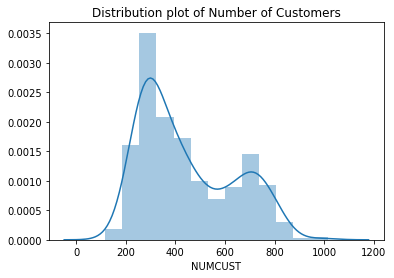

In [58]:
sns.distplot(HDR_resample_daily.NUMCUST)
plt.title("Distribution plot of Number of Customers")
plt.show()

Even though average number of customers is 442 , in the distribution plot we can see that the peak is at around 300 

In [62]:
HDR_resample_daily.MDSETOTAL.mean()

5884.1187049180235

Average Sales in a day is around 5890

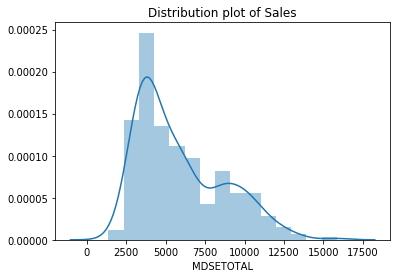

In [50]:
sns.distplot(HDR_resample_daily.MDSETOTAL)
plt.title("Distribution plot of Sales")
plt.show()

Also , in the distribution plot , we can observe that on most days , the sales is around 3500